In [43]:
import requests
import re
from bs4 import BeautifulSoup
import time
import selenium
from selenium import webdriver
import matplotlib.pyplot as plt
from selenium.common.exceptions import NoSuchElementException        
from selenium.common.exceptions import StaleElementReferenceException        

# Set headers
headers = requests.utils.default_headers()
headers.update(
    {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'})

urls = [
    'https://www.sauto.cz/inzerce/osobni/bmw/m4'
]

driver = webdriver.Chrome()

def render_page(url):
    driver.get(url)
    time.sleep(3)
    r = driver.page_source
    # driver.quit()
    return r

def returnInt(value):
    return int(value.replace(" ", ""))

r = render_page(urls[0])

soup = BeautifulSoup(r, "html.parser")

average = 0
value = ""
price = 0
sumTotal = 0
itemsTotal = 0
priceListTotal = 0

def scrapePrice():
    sum = 0
    items = 0
    priceList = []
    for i in soup.select('.price strong'):
        sum += returnInt(i.text)
        priceList.insert(items, returnInt(i.text))
        items += 1
    result = (sum, items, priceList)     
    return result

tuple = scrapePrice()
sumTotal = tuple[0]
itemsTotal = tuple[1]
priceListTotal = tuple[2]

def check_exists_by_cssSelector(css):
    try:
        driver.find_element_by_css_selector(css)
    except NoSuchElementException:
        return False
    except StaleElementReferenceException:
        return False
    return True

elementString = "#nextPage"

while check_exists_by_cssSelector(elementString):
    driver.find_element_by_css_selector(elementString).click()
    time.sleep(3)
    r = render_page(driver.current_url)
    soup = BeautifulSoup(r, "html.parser")
    tuple = scrapePrice()
    sumTotal += tuple[0]
    itemsTotal += tuple[1]
    priceListTotal += tuple[2]

driver.quit()

average = sumTotal / itemsTotal

print("Items: " + str(itemsTotal))
print("Min: " + str(min(priceListTotal)))
print("Max: " + str(max(priceListTotal)))
print("Average: " + str(average))
if average > 100000:
  print("Nikdy na to nebudes mit prachy voe")
else:
    print("Tak na tenhle vrak mas!")

Items: 46
Min: 999000
Max: 4477000
Average: 1779116.5869565217
Nikdy na to nebudes mit prachy voe


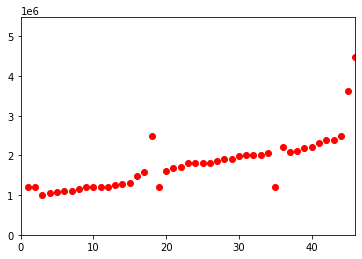

In [44]:
itemsListByIndex = []
for (i, item) in enumerate(priceListTotal, start=1):
    itemsListByIndex.append(i)

plt.plot(itemsListByIndex, priceListTotal, 'ro')
plt.axis([0, itemsTotal, 0, max(priceListTotal) + 1000000])
plt.show()